# Foreseeing Variable Problems When Building ML Models

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)
# additional formatting - https://towardsdatascience.com/a-quick-and-easy-guide-to-conditional-formatting-in-pandas-8783035071ee

## Identifying numerical and categorical variables

In [2]:
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan 

In [3]:
data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('data/titanic.csv', index=False)

In [4]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
data.shape

(1309, 14)

In [6]:
data = pd.read_csv('data/titanic.csv')
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [8]:
data['fare'].unique()[0:20]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [10]:
data.nunique() # število unikatnih vrednosti v vsakem stolpcu posebej

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         181
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [13]:
data['embarked'].unique()
# manjse stevilo kategorij

array(['S', 'C', nan, 'Q'], dtype=object)

In [12]:
# inspect unique values - mixed variable
data['cabin'].unique()[0:20]
# vecje stevilo kategorij

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T'],
      dtype=object)

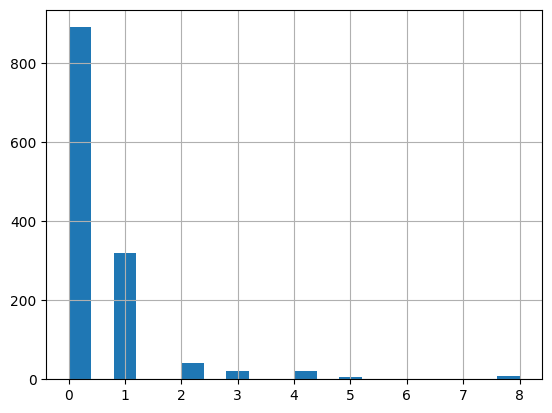

In [15]:
data['sibsp'].hist(bins=20)
plt.show()
# histogrami pomagajo za hitro vizualizacijo razporeditve podatkov

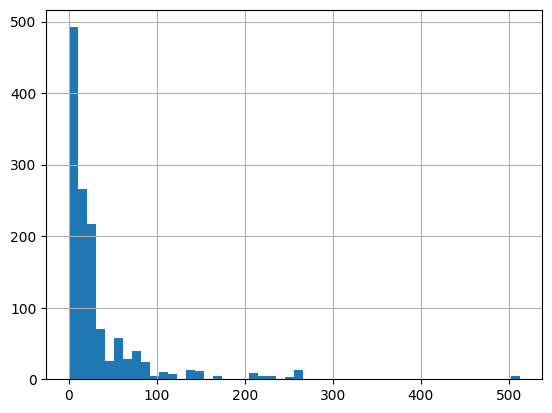

In [16]:
data['fare'].hist(bins=50)
plt.show()

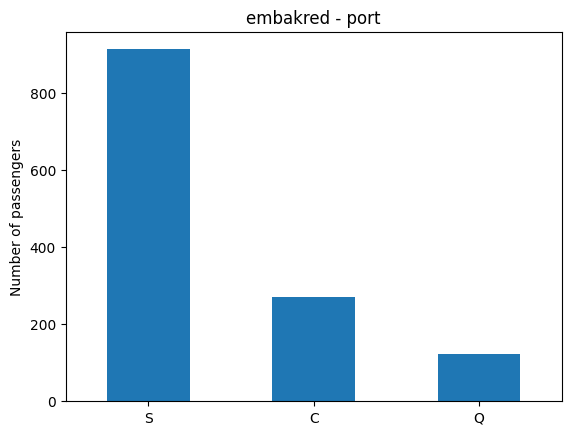

In [17]:
# bar plots for categorical variables
data['embarked'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of passengers')
plt.title('embakred - port')
plt.show()

## Quantifying missing data

- Visit the following website: https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup98-mld/epsilon_mirror/.
- Click the `cup98lrn.zip` link to begin the download.
- Unzip the file and save `cup98LRN.txt` in the same folder where you'll run the commands of the recipes.

In [21]:
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
# load the dataset
data = pd.read_csv('./data/cup98LRN.txt', usecols=cols)

# let's inspect the first 5 rows
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [22]:
data.shape

(95412, 11)

In [23]:
data.isnull().sum()

AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

In [24]:
data.isnull().mean() * 100

AGE         24.802960
NUMCHLD     87.018404
INCOME      22.309563
WEALTH1     46.882992
MBCRAFT     55.395548
MBGARDEN    55.395548
MBBOOKS     55.395548
MBCOLECT    55.458433
MAGFAML     55.395548
MAGFEM      55.395548
MAGMALE     55.395548
dtype: float64

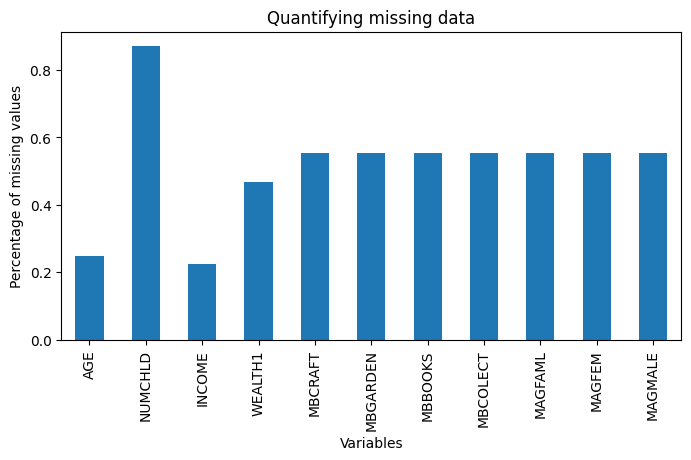

In [25]:
data.isnull().mean().plot.bar(figsize=(8,4))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

## Determining cardinality in categorical variables

**The number of unique categories in a variable is called cardinality.**

In [26]:
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
data = pd.read_csv('data/cup98LRN.txt', usecols=cols)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,,X


In [27]:
data = data.replace(' ', np.nan)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [28]:
data.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

In [29]:
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

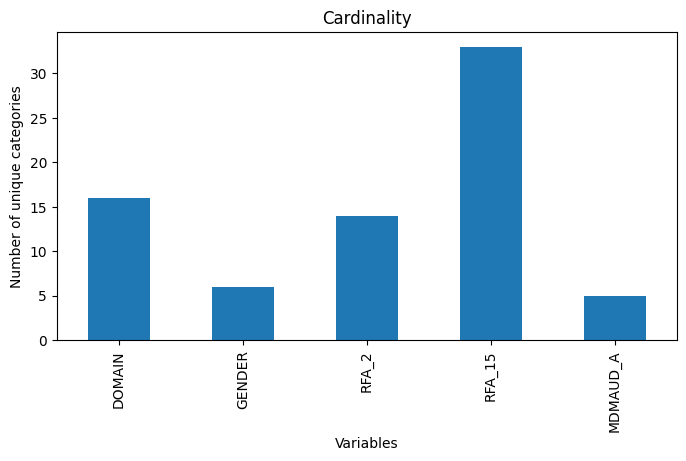

In [30]:
data.nunique().plot.bar(figsize=(8,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

## Pinpointing rare categories in categorical variables

pri veliko kategoricnih vrednostih imamo dominantne in rare kategorije (1-5%)

V določenih primerih nam rare kategorije koristijo -> npr. detekcija spamma -> outlierji so pomembni
V nekaterih primerih rare kategorije sploh ne koristijo

In [31]:
data = pd.read_csv('data/car.data', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [32]:
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [33]:
label_freq = data['class'].value_counts() / len(data) * 100
print(label_freq)

unacc    70.023148
acc      22.222222
good      3.993056
vgood     3.761574
Name: class, dtype: float64


good in vgood sta v tem primeru rare vrednosti

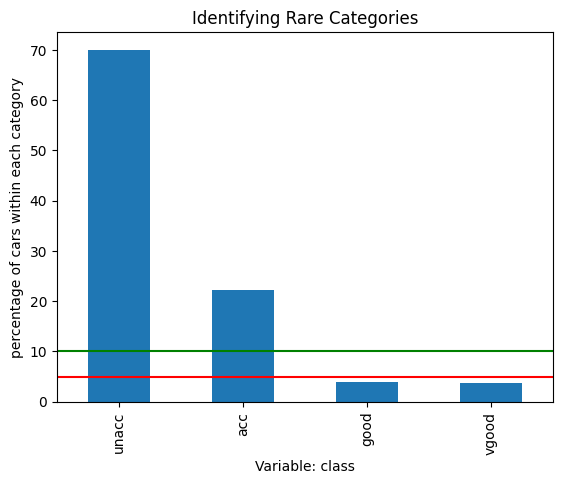

In [36]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=5, color='red')
fig.axhline(y=10, color='green')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

## Identifying a linear relationship

ugotavljamo s scatter plottom ali residual metodami.

Ugotovitev linearnih odnosov nam pove, ali je recimo smiselno uporabiti linearne modele za analizo?

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
np.random.seed(29)
x = np.random.randn(200)

In [39]:
y = x * 10 + np.random.randn(200) * 2

In [40]:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']

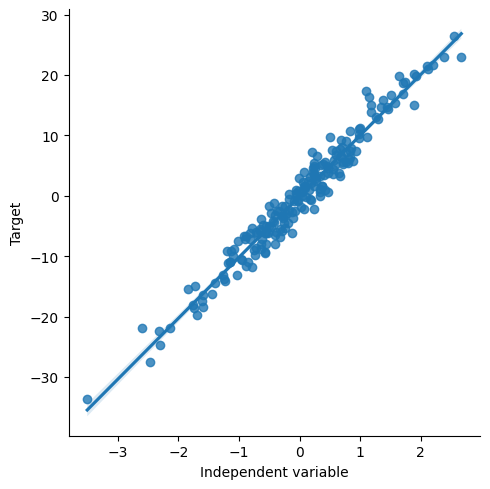

In [44]:
# we used the seaborn lmplot() method, which allows us to plot the data and fit and display a linear model on top of it
sns.lmplot(x="x", y="y", data=data, order=1) # order=n argument avtomatsko doda krivuljo n-tega reda, ki se prilega točkam
plt.ylabel('Target')
plt.xlabel('Independent variable')
plt.show()

In [45]:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

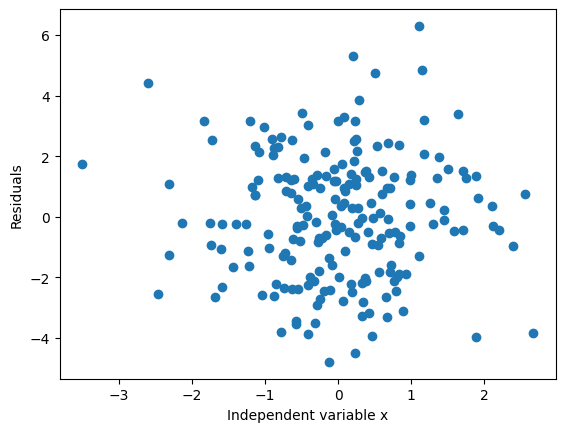

In [48]:
# Make predictions of y using the fitted linear model:
predictions = linreg.predict(data['x'].to_frame())

# Calculate the residuals, that is, the difference between the predictions and the real outcome, y:
residuals = data['y'] - predictions

# Make a scatter plot of the independent variable x and the residuals:
plt.scatter(y=residuals, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')
plt.show()
# vidimo da so residuali razporejeni okoli koordinatnega izhodišča -> nakazuje linearno odvisnost

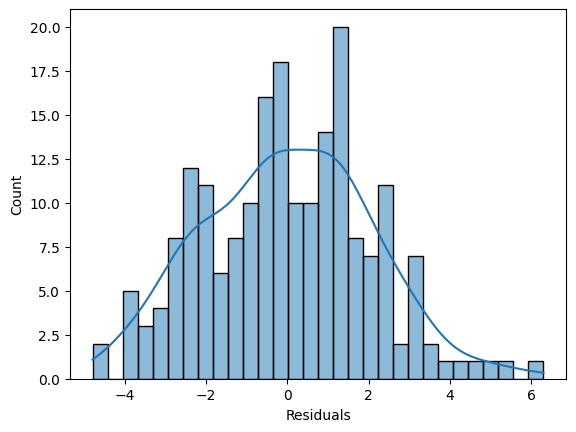

In [49]:
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.show()

### Example: Boston House price data

In [50]:
# load the the Boston House price data from scikit-learn
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston = pd.DataFrame(data, columns=feature_names)
# add the target
boston['MEDV'] = target
boston.to_csv("data/boston.csv", index=False)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


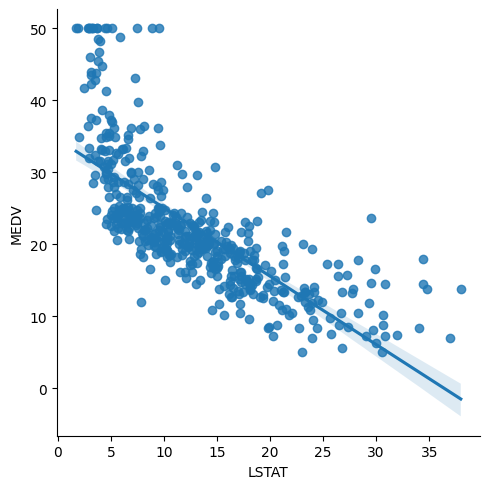

In [51]:
# we plot the variable LAST (% lower status of the population)
# vs the target MEDV (median value of the house)
sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)
plt.show()

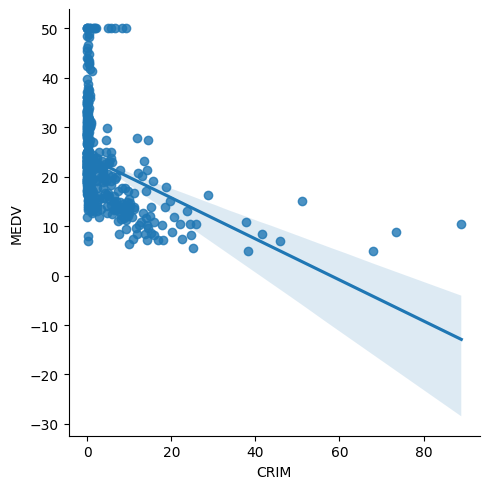

In [52]:
# now we plot CRIM (per capita crime rate by town)
# vs the target MEDV (median value of the house)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)
plt.show()

In [53]:
# now we do the same for the variable LSTAT of the boston
# house price dataset from sklearn

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

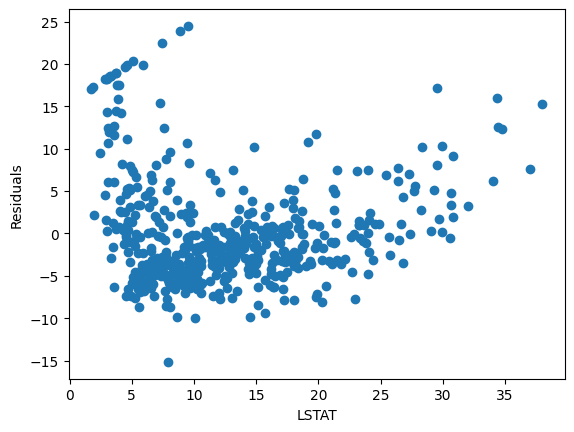

In [54]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')
plt.show()

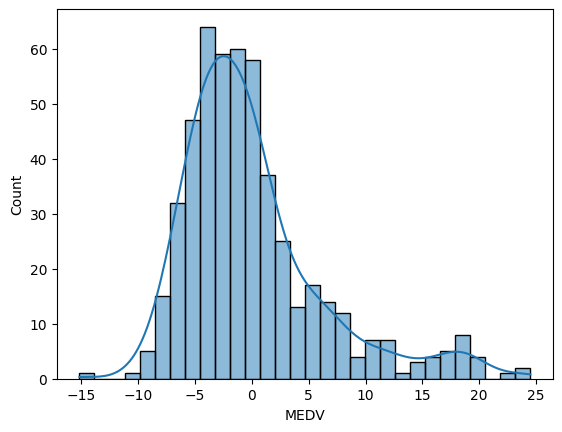

In [55]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.histplot(error, bins=30, kde=True)
plt.show()

## Identifying a normal distribution

**Linear models assume that the independent variables are normally distributed. Failure to
meet this assumption may produce algorithms that perform poorly.**

TODO: zakaj???
https://datascience.stackexchange.com/questions/88957/importance-of-normal-distribution

In [56]:
np.random.seed(29)
x = np.random.randn(200)

In [57]:
data = pd.DataFrame([x]).T
data.columns = ['x']

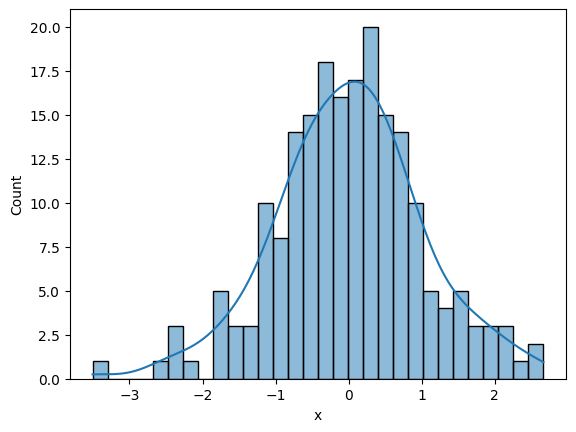

In [58]:
sns.histplot(data['x'], bins=30, kde=True)
plt.show()

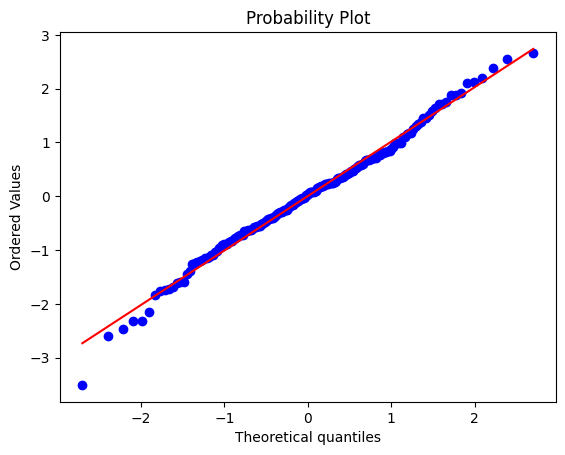

In [60]:
stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

# primer qq plota. Bolj ko so vrednosti po rdeči premici -> bolj so normalno porazdeljene.

### Example: Boston House price data

In [61]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


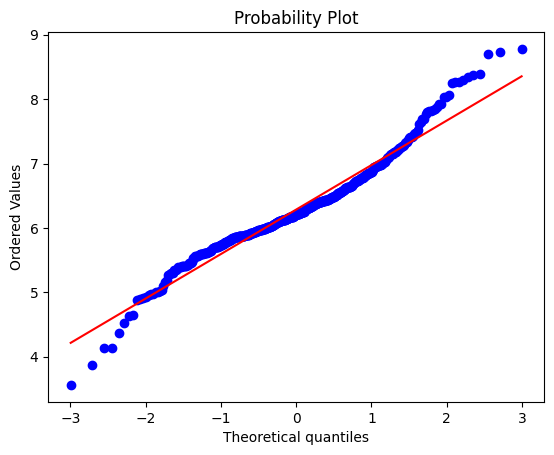

In [62]:
# histogram of the variable RM from the boston
# house price dataset from sklearn
# RM is the average number of rooms per dwelling

stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

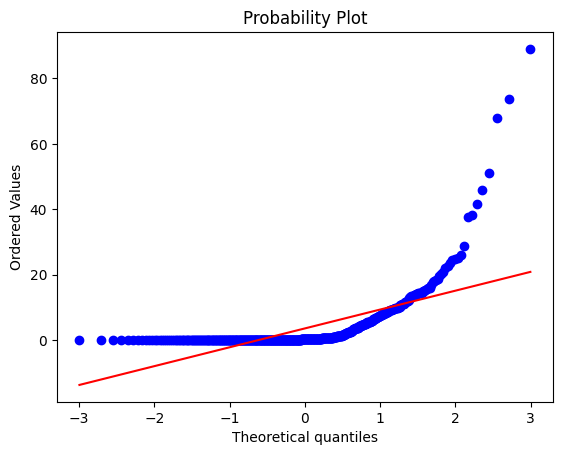

In [63]:
# just for comparison, let's go ahead and plot CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=plt)
plt.show()

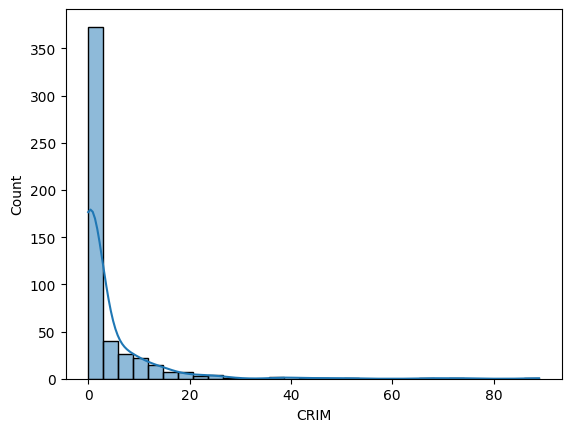

In [64]:
sns.histplot(boston['CRIM'], bins=30, kde=True)
plt.show()

## Distinguishing variable distribution

**A probability distribution is a function that describes the likelihood of obtaining the
possible values of a variable.**



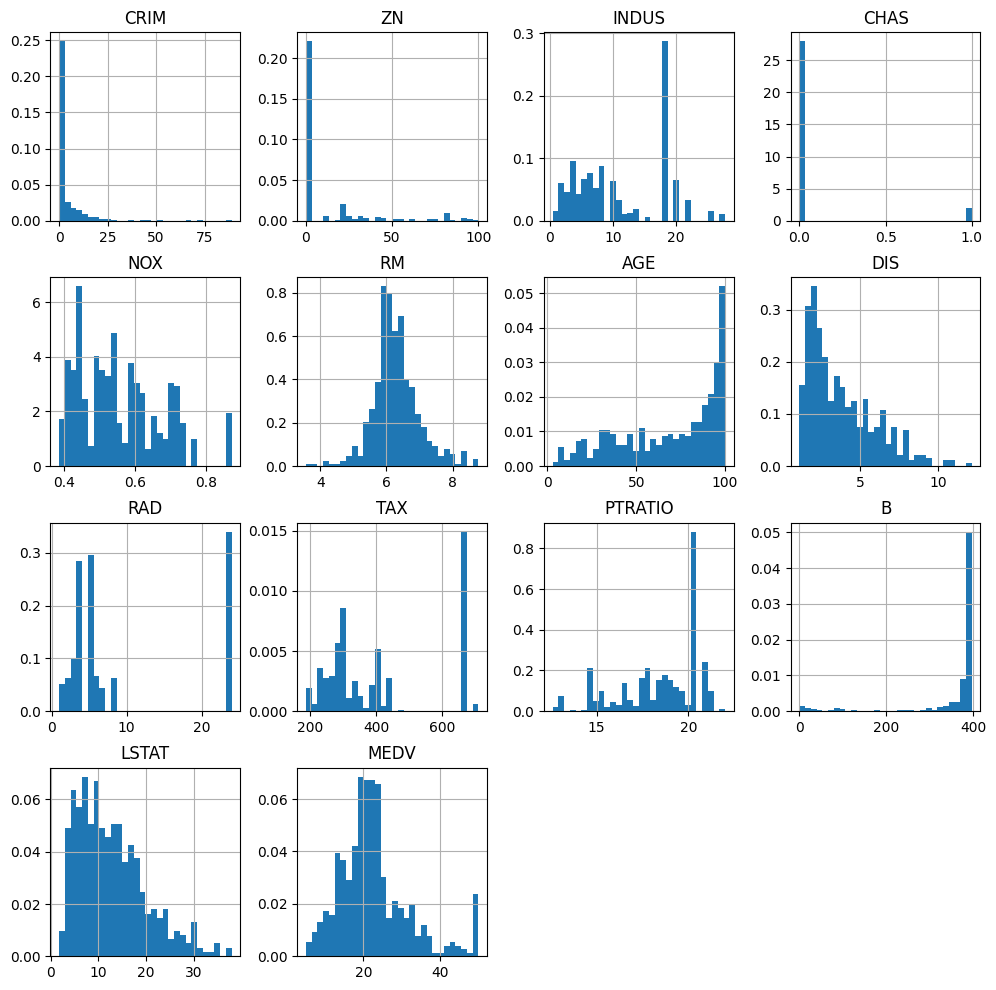

In [65]:
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

## Highlighting outliers

**An outlier is a data point that is significantly different from the remaining data.**

Smo omenili že zgoraj (v določenih primerih jih prav iščemo oz. so koristni). V nekaterih primerih pa jih želimo izločiti, ker kvarijo nadaljnji razvoj modela.



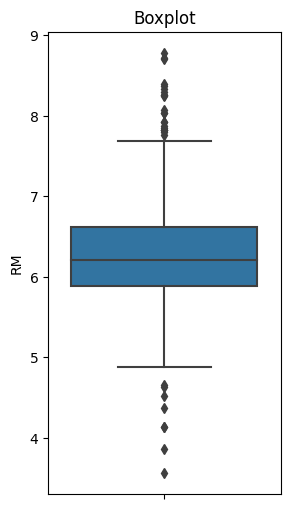

In [66]:
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')
plt.show()

samo ponazoritev kako bi to naredili v pandasu (v praksi uporabljamo namenske knjižnice)

In [67]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [68]:
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [69]:
outliers = np.where(boston['RM'] > upper_boundary, True, np.where(boston['RM'] < lower_boundary, True, False))

In [70]:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

## Comparing feature magnitude  
Veliko algoritmiov ML je zelo občutljivih na magnitude -> kako se velikostni razredi različnih značilk med sabo razlikujejo

In [71]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [72]:
boston.max() - boston.min()
# magnitude spremelnjivk se zelko razlikujejo -> sklepamo da bi te podatke pred nadaljnjo obdelavo morali skalirati

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
MEDV        45.00000
dtype: float64